In [1]:
import os
print(os.getcwd())

C:\Users\Kai\OneDrive\Dobbys


In [2]:
print(os.listdir())

['.ipynb_checkpoints', 'agaricus-lepiota (1).csv', 'Confusion_Matrix.jpg', 'data.csv', 'dobbys.dot', 'dobbys_rf.ipynb', 'feature_importances.png', 'regression.pdf', 'tree.dot']


In [3]:
import pandas as pd

data = pd.read_csv('agaricus-lepiota (1).csv')

In [4]:
data.head(5)

,classes,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
#데이터 구조
# 7. Attribute Information: (classes: edible=e, poisonous=p)
#      1. cap-shape:                bell=b,conical=c,convex=x,flat=f,
#                                   knobbed=k,sunken=s
#      2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
#      3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,
#                                   pink=p,purple=u,red=e,white=w,yellow=y
#      4. bruises?:                 bruises=t,no=f
#      5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,
#                                   musty=m,none=n,pungent=p,spicy=s
#      6. gill-attachment:          attached=a,descending=d,free=f,notched=n
#      7. gill-spacing:             close=c,crowded=w,distant=d
#      8. gill-size:                broad=b,narrow=n
#      9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g,
#                                   green=r,orange=o,pink=p,purple=u,red=e,
#                                   white=w,yellow=y
#     10. stalk-shape:              enlarging=e,tapering=t
#     11. stalk-root:               bulbous=b,club=c,cup=u,equal=e,
#                                   rhizomorphs=z,rooted=r,missing=?
#     12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
#     13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
#     14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
#                                   pink=p,red=e,white=w,yellow=y
#     15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
#                                   pink=p,red=e,white=w,yellow=y
#     16. veil-type:                partial=p,universal=u
#     17. veil-color:               brown=n,orange=o,white=w,yellow=y
#     18. ring-number:              none=n,one=o,two=t
#     19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l,
#                                   none=n,pendant=p,sheathing=s,zone=z
#     20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,
#                                   orange=o,purple=u,white=w,yellow=y
#     21. population:               abundant=a,clustered=c,numerous=n,
#                                   scattered=s,several=v,solitary=y
#     22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p,
#                                   urban=u,waste=w,woods=d

In [6]:
#결측값 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   classes                   8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shpae               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
#숫자화 작업 실시, 모든 피처들이 str 이기에 원핫 인코딩 진행 실시
data_one = pd.get_dummies(data)

In [8]:
#one-hot 데이터 확인
data_one.head(5)

,classes_e,classes_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [9]:
#target 데이터 설정(classes_e or p 둘 중 하나 삭제)
data_for_model = data_one.drop(columns = ['classes_p'])

In [10]:
#데이터 재 확인
data_for_model.head(5)

,classes_e,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [11]:
#input, target 데이터 설정
data_for_input = data_for_model.drop(columns = ['classes_e'])
data_for_target = data_for_model['classes_e']

<AxesSubplot:xlabel='classes', ylabel='count'>

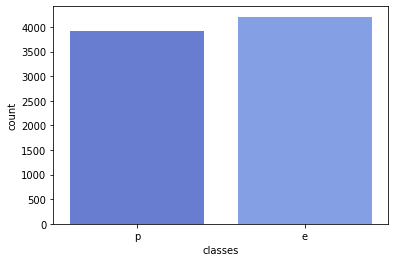

In [12]:
#데이터 분포 확인
import seaborn as sns
import matplotlib.pyplot as plt

palette3 = sns.color_palette('coolwarm', 10)
sns.countplot(x=data['classes'], data = data, palette=palette3)

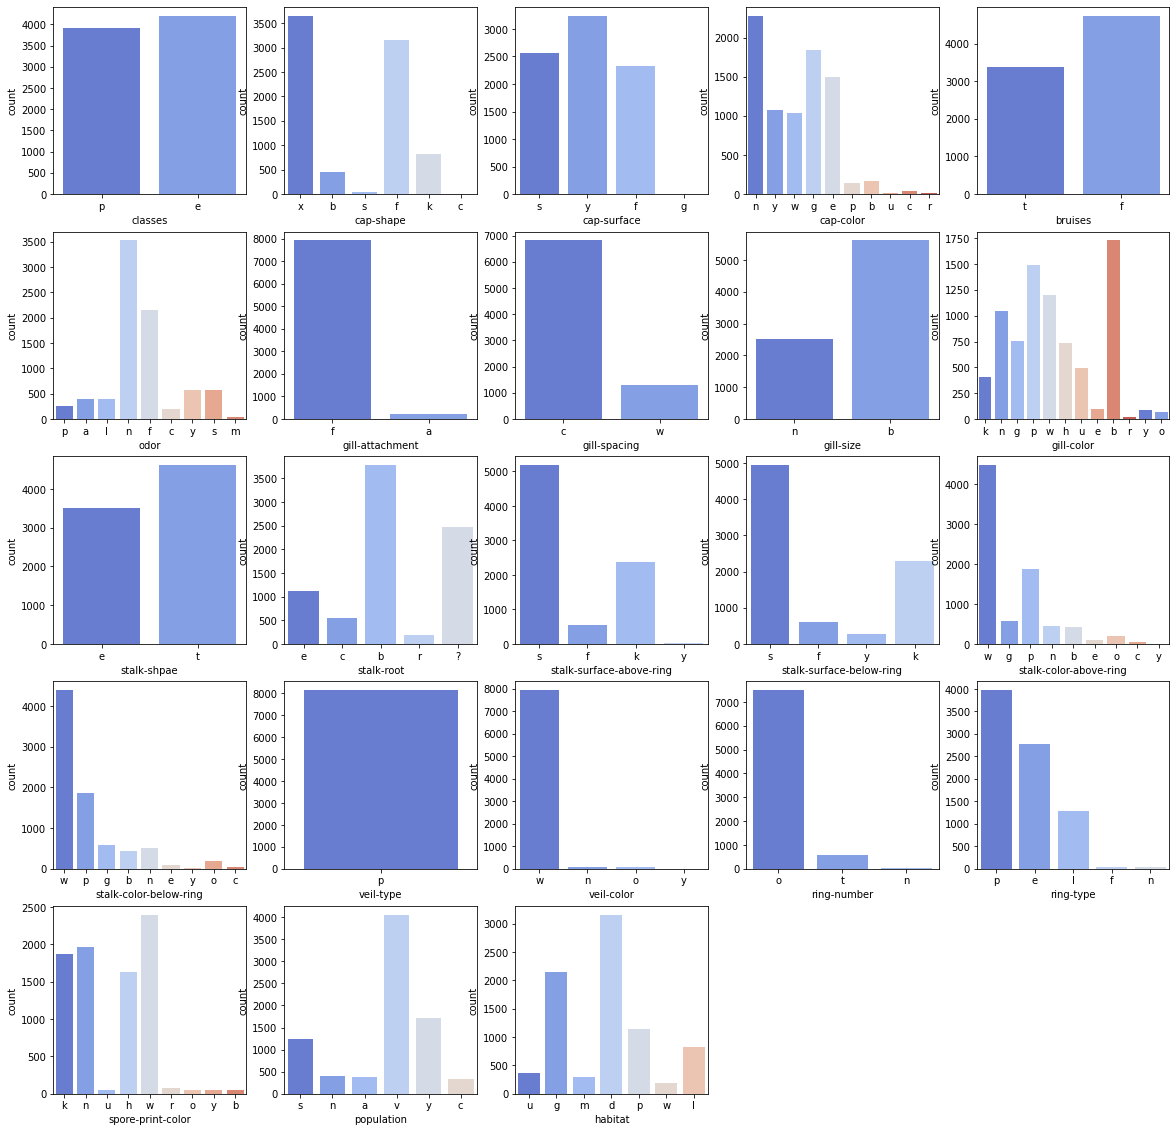

In [13]:
#데이터 모든 분포 확인
plt.figure(figsize = (20,20))
for i in range(len(data.columns)):
    plt.subplot(5,5, i+1)
    sns.countplot(x = data.columns[i], data = data, palette = palette3)


In [14]:
#훈련, 평가용 데이터로 나누기
#staratify -> random sampling 시 데이터 편향을 막기위한 계층 추출 방법
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data_for_input, data_for_target,
                                                                     stratify=data_for_target,
                                                                     test_size = 0.2,
                                                                     random_state = 1234)

In [15]:
#모델 로드(베이직 모델, 러프하게 보기위함)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(train_input, train_target)

rf_pred = rf.predict(test_input)

#confusion_matrix 만들기
from sklearn.metrics import confusion_matrix
cm = confusion_matrix
cm_rf = cm(test_target, rf_pred)
print(cm_rf)

#model performance check
from sklearn.metrics import classification_report

report = classification_report
report_rf = report(test_target, rf_pred)
print(report_rf)

#베이직 모델임에도 불구하고 완벽하게 분류하는 것을 보니 피처마다 속성이 매우 다르기에 구분을
#잘하는 것으로 보임, 이런 경우에는 과적합이 아닌지 의심은 해봐야함

[[783   0]
 [  0 842]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       783
           1       1.00      1.00      1.00       842

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



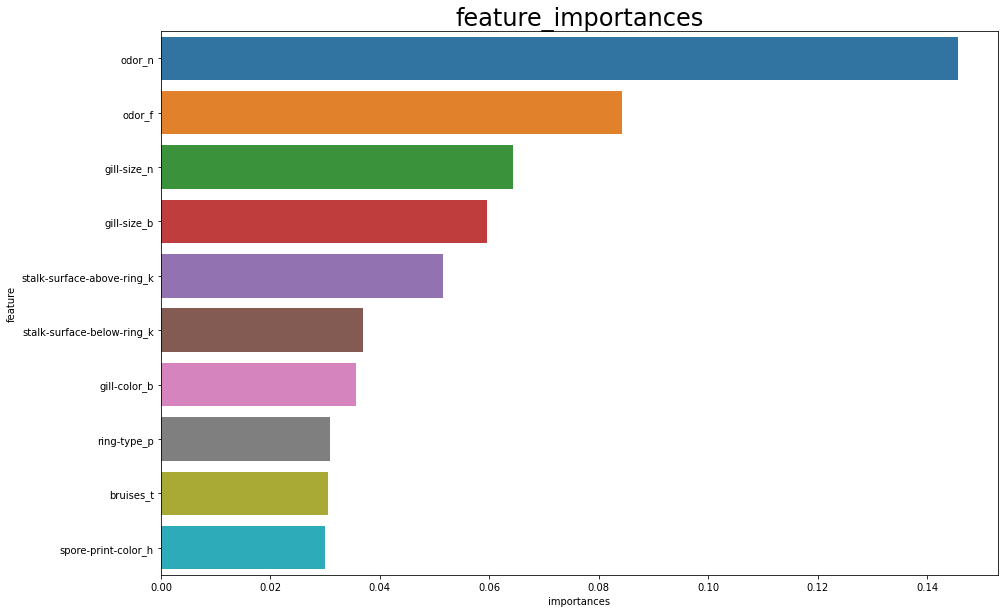

In [16]:
#피처 중요도 추출

importance = rf.feature_importances_
feature = train_input.columns
importances = pd.DataFrame()
importances['feature'] = feature
importances['importances'] = importance

importances.sort_values('importances', ascending=False, inplace = True)
importances.reset_index(drop=True, inplace = True)

importances = importances[:10]

fig, ax = plt.subplots(figsize = (15,10))
plt.rcParams.update({'font.size' : 20,
                    })
import seaborn as sns
sns.barplot(x='importances', y='feature', data = importances)
plt.title('feature_importances')
plt.savefig('feature_importances')

#간단한 해석으로
#odor_n이 가장 높은 것으로 나왔다 -> one-hot 백터로 되어 있기에 이 의미는
#odor_n의 유무가 독버섯을 구분하는데 가장 큰 역할을 한다.
#odor_n은 냄새의 유무이다 즉 odor_n = 0 -> 냄새가 있다, odor_n = 1 냄새가 없다

C:\Users\Kai\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x720 with 0 Axes>

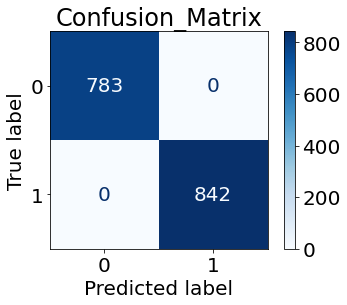

In [17]:
#confusion_matrix 시각화
from sklearn.metrics import plot_confusion_matrix
plt.figure(figsize = (10,10))
plt.rcParams.update({'font.size' : 20,})

plot = plot_confusion_matrix(rf,
                            test_input, test_target,
                            cmap = plt.cm.Blues,
                            normalize = None,
                            )
plt.title('Confusion_Matrix')
plt.savefig('Confusion_Matrix.jpg')

확률 최고 값: 1.0


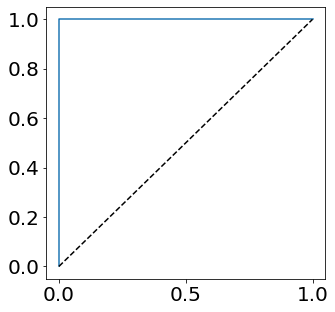

In [18]:
#roc 커브 만들기
import numpy as np
from sklearn.metrics import roc_curve
threshold = rf.predict_proba(test_input)[:, 1]

print('확률 최고 값:', np.round(np.max(threshold), 2))

fpr, tpr, thresholds = roc_curve(test_target, threshold)

#roc 그래프 그리기
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label = 'ROC')
plt.plot([0,1], [0,1], 'k--', label = "Random")

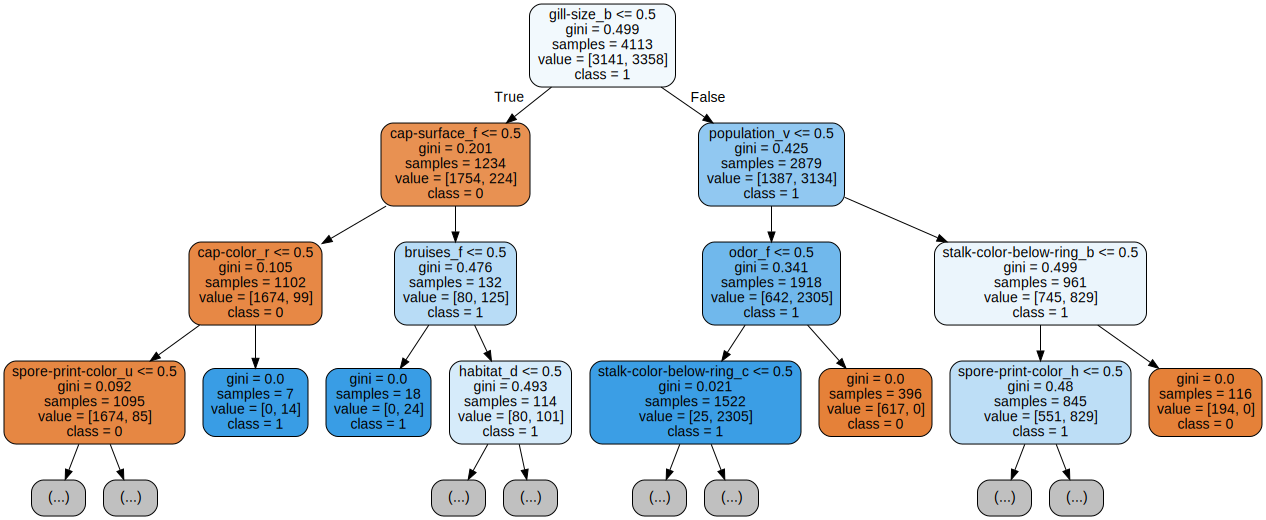

In [25]:
from sklearn.tree import export_graphviz

tree = rf.estimators_[3]

export_graphviz(tree, out_file='dobbys.dot', 
                feature_names = data_for_input.columns,
                class_names = ['0', '1'],
                max_depth = 3, # 표현하고 싶은 최대 depth
                precision = 3, # 소수점 표기 자릿수
                filled = True, # class별 color 채우기
                rounded=True, # 박스의 모양을 둥글게
               )

import graphviz

#dot 파일 노트북에서 시각화
with open('dobbys.dot') as f:
    grpah = f.read()
src = graphviz.Source(grpah)

#저장
src.format = 'png'
src.render('dobbys_tree')

src

